In [ ]:
# prompt: upload file using google colab

from google.colab import files
uploaded = files.upload()

Saving archive (2).zip to archive (2).zip


In [ ]:
import zipfile
with zipfile.ZipFile("archive (2).zip","r")as f:
    f.extractall()

### LOAD THE DATA WITH TRAIN/VAL

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
data_dir = "Potato Leaf Disease Dataset in Uncontrolled Environment"

In [ ]:
train= image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val= image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)


Found 3076 files belonging to 7 classes.
Using 2461 files for training.
Found 3076 files belonging to 7 classes.
Using 615 files for validation.


### functions

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history.get('val_accuracy')

    loss = history.history['loss']
    val_loss = history.history.get('val_loss')

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    if val_acc: plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    if val_loss: plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


### VISUALISATION

In [ ]:
import matplotlib.pyplot as plt

(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)


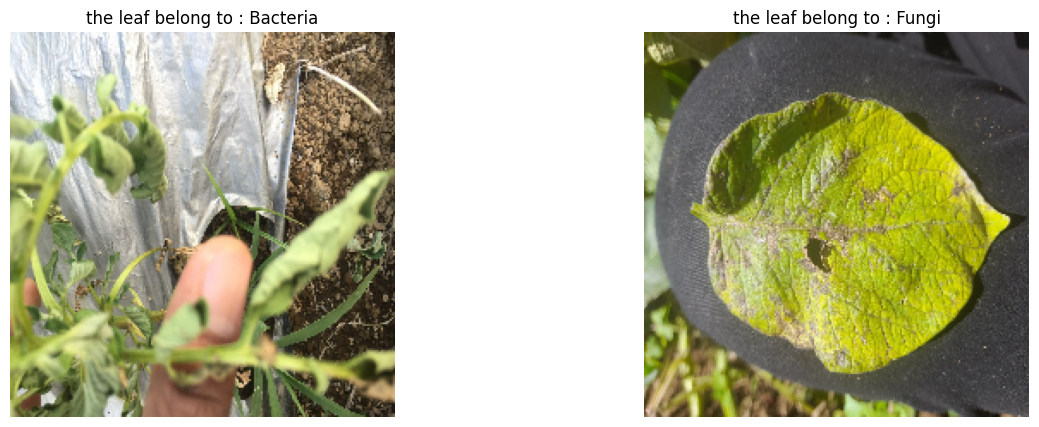

In [ ]:
import random as rd
class_name = val.class_names
plt.figure(figsize=(15,5))
for img,lab in val.take(5):
    plt.subplot(1,2,1)
    n=rd.randint(0,img.shape[0]-1)
    print(img.shape)
    plt.imshow(img[n]/255.)
    class_index=lab[n]
    leaf_type=class_name[class_index]
    plt.title(f"the leaf belong to : {leaf_type}")
    plt.axis("off")
    #____________________________
    plt.subplot(1,2,2)
    n=rd.randint(0,img.shape[0]-1)
    plt.imshow(img[n]/255.)
    class_index=lab[n]
    leaf_type=class_name[class_index]
    plt.title(f"the leaf belong to : {leaf_type}")
    plt.axis("off")

In [ ]:
import tensorflow as tf

In [ ]:
train=train.prefetch(tf.data.AUTOTUNE)
val=val.prefetch(tf.data.AUTOTUNE)

### creating augmentation layer

In [ ]:
from tensorflow.keras import Sequential,layers
augmentation_layer=Sequential(
    [
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.Resizing(224, 224),
    ]
)

### building model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
inpute=layers.Input(shape=(224, 224, 3))
x= augmentation_layer(inpute)
x= layers.Conv2D(128,3,activation="relu")(x)
x= layers.MaxPool2D()(x)
x= layers.Conv2D(64,3,activation="relu")(x)
x= layers.MaxPool2D()(x)
x= layers.Conv2D(32,3,activation="relu")(x)
x= layers.MaxPool2D()(x)
x= layers.Conv2D(16,3,activation="relu")(x)
x= layers.MaxPool2D()(x)
x= layers.Flatten()(x)
x= layers.Dense(128,activation="relu")(x)
x= layers.Dense(64,activation="relu")(x)
output= layers.Dense(7,activation="softmax")(x)
model_0=Model(inpute,output)

model_0.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,215 (1.54 MB)

 Trainable params: 404,215 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_0.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
summary_0=model_0.fit(train,validation_data=val,epochs=10,validation_steps=int(0.4 * len(val)))

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 31s 280ms/step - accuracy: 0.2330 - loss: 1.8420 - val_accuracy: 0.1914 - val_loss: 1.7895
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 263ms/step - accuracy: 0.2145 - loss: 1.7919 - val_accuracy: 0.2148 - val_loss: 1.7359
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 271ms/step - accuracy: 0.2773 - loss: 1.6995 - val_accuracy: 0.3164 - val_loss: 1.5752
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 82s 806ms/step - accuracy: 0.3234 - loss: 1.6166 - val_accuracy: 0.3711 - val_loss: 1.5859
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 265ms/step - accuracy: 0.3829 - loss: 1.5164 - val_accuracy: 0.4180 - val_loss: 1.4510
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 528ms/step - accuracy: 0.4259 - loss: 1.4471 - val_accuracy: 0.4375 - val_loss: 1.3854
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 524ms/step - accuracy: 0.4420 - loss: 1.4046 - val_accuracy: 0.4727 - val_loss: 1.3308
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 523ms/step - accuracy: 0.4649 - loss: 1.3421 - val_accu

In [ ]:
evaluation_m_0=model_0.evaluate(val)
evaluation_m_0

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - accuracy: 0.4165 - loss: 1.4086


[1.3734185695648193, 0.4390243887901306]

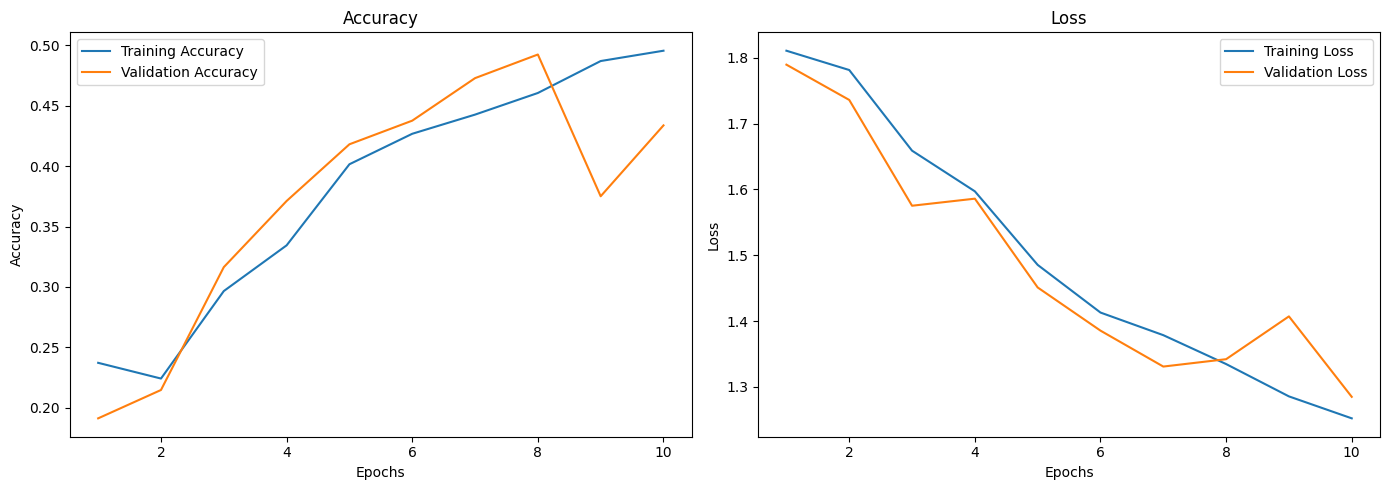

In [ ]:
plot_history(summary_0)

### transfer learning

In [ ]:
efficent_net=tf.keras.applications.efficientnet.EfficientNetB7(include_top=False)
efficent_net.trainable=False

In [ ]:
from tensorflow.keras import Sequential
augmentation_layer_2=Sequential(
    [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.Resizing(224, 224),
    ]
)

In [ ]:
inpute=layers.Input(shape=(224, 224, 3))
x= augmentation_layer_2(inpute)
x=efficent_net(x)
x= layers.Dense(64,activation="relu")(x)
x= layers.Dropout(0.4)(x)
x = layers.GlobalAveragePooling2D()(x)
output= layers.Dense(7,activation="softmax")(x)
model_1=Model(inpute,output)

model_1.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb7 (Functional)     │ (None, 7, 7, 2560)     │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7, 7, 64)       │       163,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,262,046 (245.14 MB)

 Trainable params: 164,359 (642.03 KB)

 Non-trainable params: 64,097,687 (244.51 MB)

In [ ]:
model_1.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
summary_1=model_1.fit(train,validation_data=val,epochs=10,validation_steps=int(0.4 * len(val)))

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 94s 681ms/step - accuracy: 0.3868 - loss: 1.5339 - val_accuracy: 0.5586 - val_loss: 1.1541
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 66s 484ms/step - accuracy: 0.5766 - loss: 1.0922 - val_accuracy: 0.6172 - val_loss: 0.9964
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 486ms/step - accuracy: 0.6433 - loss: 0.9352 - val_accuracy: 0.6406 - val_loss: 0.9620
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 530ms/step - accuracy: 0.6721 - loss: 0.8614 - val_accuracy: 0.6953 - val_loss: 0.8142
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 485ms/step - accuracy: 0.6869 - loss: 0.8175 - val_accuracy: 0.6797 - val_loss: 0.8515
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 532ms/step - accuracy: 0.6846 - loss: 0.8140 - val_accuracy: 0.7227 - val_loss: 0.7784
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 37s 483ms/step - accuracy: 0.7114 - loss: 0.7399 - val_accuracy: 0.6562 - val_loss: 0.8484
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 531ms/step - accuracy: 0.7196 - loss: 0.7474 - val_accu

In [ ]:
evaluation_m_1=model_1.evaluate(val)
evaluation_m_1

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 447ms/step - accuracy: 0.7414 - loss: 0.6962


[0.72443687915802, 0.7317073345184326]

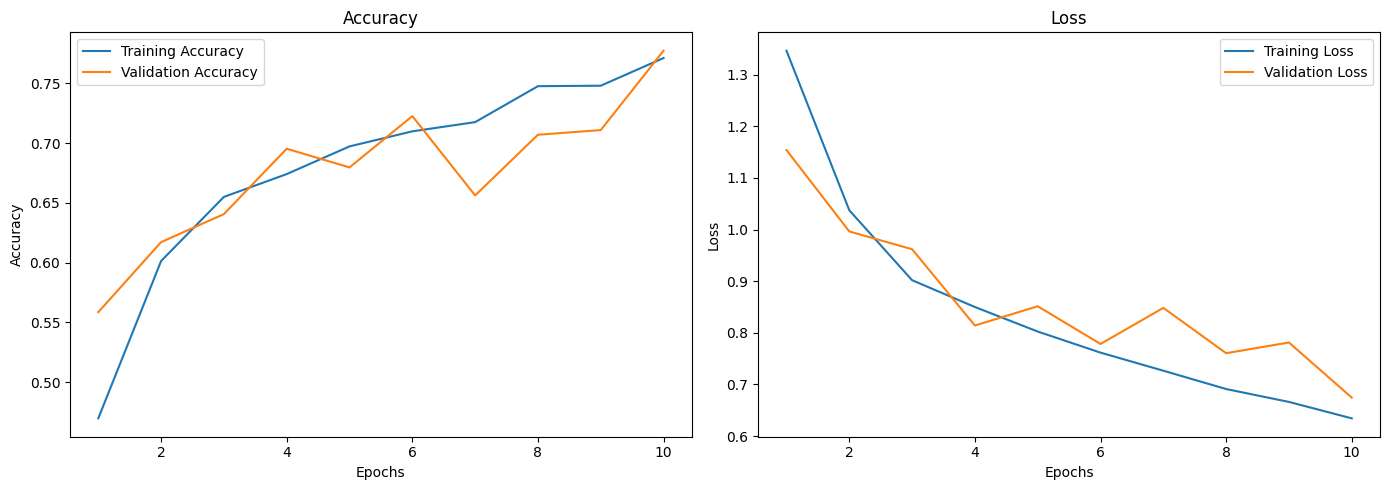

In [ ]:
plot_history(summary_1)

### FINE TUNING MODEL 1

In [ ]:
efficent_net.layers

[<InputLayer name=input_layer_2, built=True>,
 <Rescaling name=rescaling_1, built=True>,
 <Normalization name=normalization, built=True>,
 <Rescaling name=rescaling_2, built=True>,
 <ZeroPadding2D name=stem_conv_pad, built=True>,
 <Conv2D name=stem_conv, built=True>,
 <BatchNormalization name=stem_bn, built=True>,
 <Activation name=stem_activation, built=True>,
 <DepthwiseConv2D name=block1a_dwconv, built=True>,
 <BatchNormalization name=block1a_bn, built=True>,
 <Activation name=block1a_activation, built=True>,
 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True>,
 <Reshape name=block1a_se_reshape, built=True>,
 <Conv2D name=block1a_se_reduce, built=True>,
 <Conv2D name=block1a_se_expand, built=True>,
 <Multiply name=block1a_se_excite, built=True>,
 <Conv2D name=block1a_project_conv, built=True>,
 <BatchNormalization name=block1a_project_bn, built=True>,
 <DepthwiseConv2D name=block1b_dwconv, built=True>,
 <BatchNormalization name=block1b_bn, built=True>,
 <Activation name=bl

In [ ]:
len(efficent_net.layers)

814

In [ ]:
efficent_net.trainable=True

for layer in efficent_net.layers[:-25]:
    layer.trainable=False


In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
summary_2=model_1.fit(train,validation_data=val,epochs=15,validation_steps=int(0.4 * len(val)))

Epoch 1/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 94s 659ms/step - accuracy: 0.6915 - loss: 0.8610 - val_accuracy: 0.7070 - val_loss: 0.7521
Epoch 2/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 82s 670ms/step - accuracy: 0.7855 - loss: 0.6353 - val_accuracy: 0.7461 - val_loss: 0.6859
Epoch 3/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 82s 670ms/step - accuracy: 0.7739 - loss: 0.6297 - val_accuracy: 0.7695 - val_loss: 0.6385
Epoch 4/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 71s 524ms/step - accuracy: 0.7736 - loss: 0.6132 - val_accuracy: 0.7344 - val_loss: 0.6928
Epoch 5/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 518ms/step - accuracy: 0.7830 - loss: 0.5858 - val_accuracy: 0.7344 - val_loss: 0.6599
Epoch 6/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8125 - loss: 0.5543 - val_accuracy: 0.7344 - val_loss: 0.6650
Epoch 7/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7972 - loss: 0.5702 - val_accuracy: 0.7227 - val_loss: 0.7058
Epoch 8/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8191 - loss: 0.5167 - val_accuracy: 0.7

In [ ]:
evaluation_m_1_ft=model_1.evaluate(val)
evaluation_m_1_ft

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 417ms/step - accuracy: 0.7692 - loss: 0.6073


[0.6196342706680298, 0.7642276287078857]

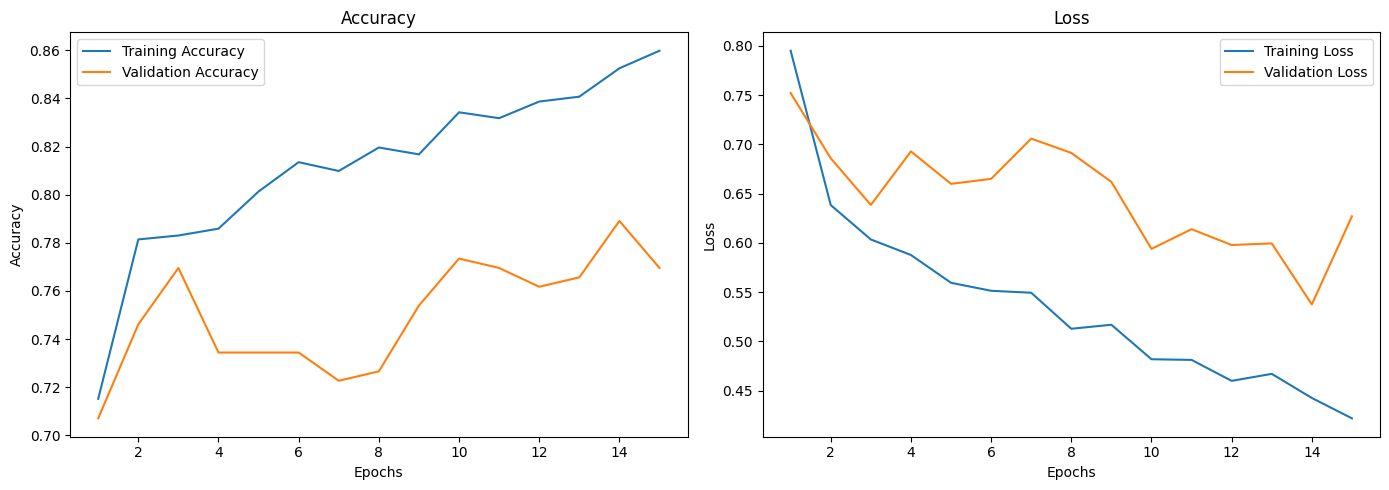

In [ ]:
plot_history(summary_2)

# resnet feature extraction

In [ ]:
resnet=tf.keras.applications.resnet.ResNet50(include_top=False)
resnet.trainable=False

In [ ]:
inpute=layers.Input(shape=(224, 224, 3))
x= augmentation_layer(inpute)
x=resnet(x)
x= layers.Dense(64,activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
output= layers.Dense(7,activation="softmax")(x)
model_2=Model(inpute,output)

model_2.summary()

In [ ]:
model_2.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
summary_3=model_2.fit(train,validation_data=val,epochs=5,validation_steps=int(0.4 * len(val)))

Epoch 1/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 34s 298ms/step - accuracy: 0.2435 - loss: 1.8099 - val_accuracy: 0.1758 - val_loss: 1.8653
Epoch 2/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 277ms/step - accuracy: 0.2627 - loss: 1.7650 - val_accuracy: 0.2891 - val_loss: 1.7728
Epoch 3/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.2871 - loss: 1.7170 - val_accuracy: 0.2383 - val_loss: 1.7210
Epoch 4/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 288ms/step - accuracy: 0.2986 - loss: 1.7159 - val_accuracy: 0.2734 - val_loss: 1.6969
Epoch 5/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - accuracy: 0.3066 - loss: 1.6874 - val_accuracy: 0.2266 - val_loss: 1.7311


In [ ]:
evaluation_m_2=model_2.evaluate(val)
evaluation_m_2

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.2581 - loss: 1.7475


[1.7524447441101074, 0.25040650367736816]

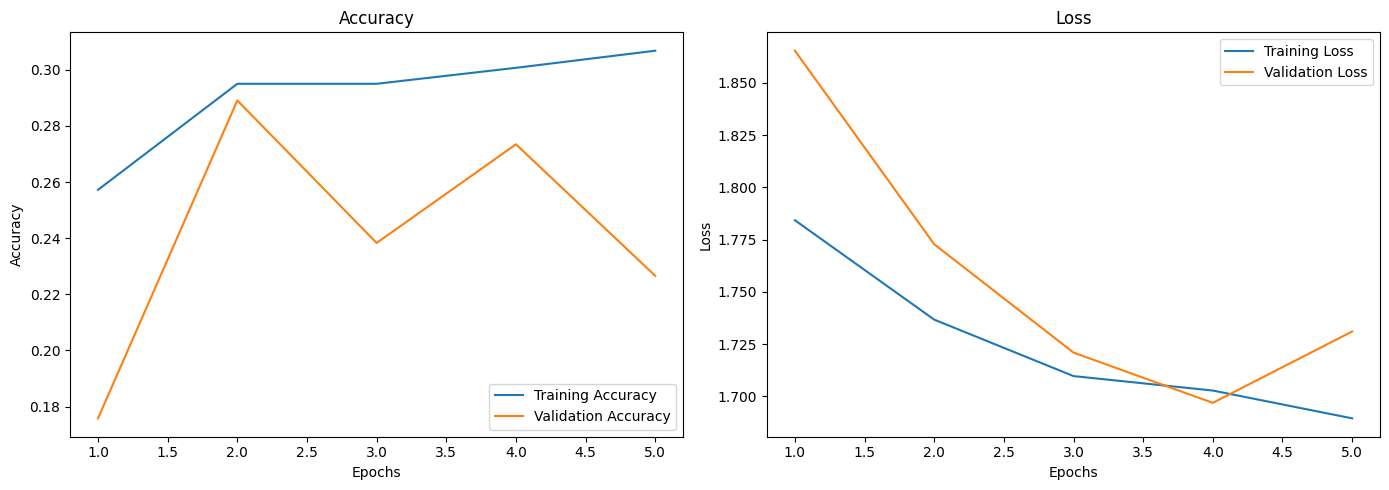

In [ ]:
plot_history(summary_3)

# evaluating the best model

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


In [41]:
import numpy as np
y_pred_probs = model_1.predict(val)

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = []

for batch in val:
    images, labels = batch
    y_true.extend(labels.numpy())
y_true = np.array(y_true)


20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 836ms/step


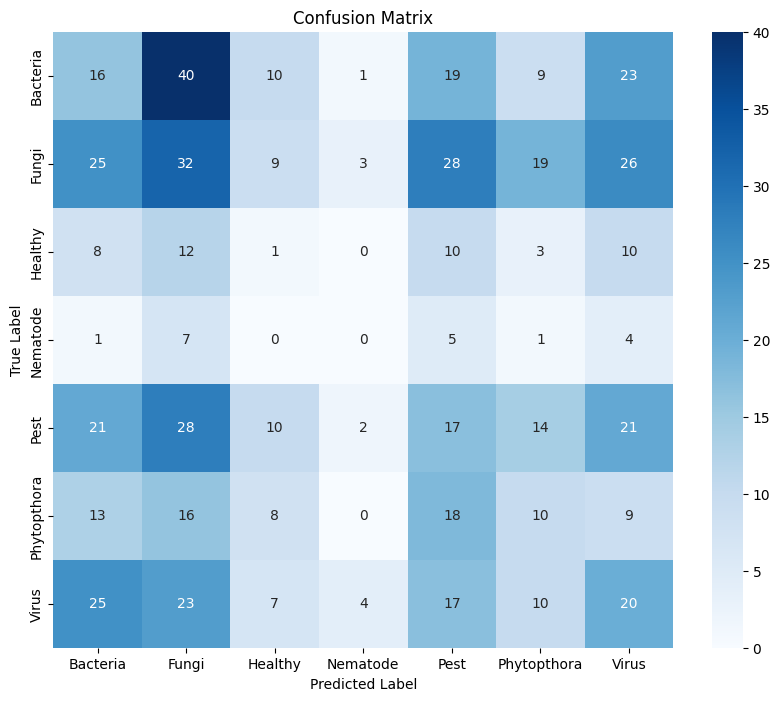

In [51]:
plot_confusion_matrix(y_true,y_pred,class_name)

In [53]:
model_1.save("potato_6_class.keras")